In [47]:
from libraries import*

**Define Lorentz func**

In [48]:

def lorentz(x, gamma, x0, A): #define lorentz fnc for single peak
    return (A*gamma/(np.pi*((x - x0)**2) + gamma**2))

def lorentz_multi(x, gamma, center, split, A): #define fnc for three peaks
    return lorentz(x, gamma, center - split, A) + lorentz(x, gamma, center, A) + lorentz(x, gamma, center + split, A)

def lorentz_cluster(x, gamma, center_1, split_1, center_2, split_2, A): #define fnc for cluster of six peaks 
    return lorentz_multi(x, gamma, center_1, split_1, A) + lorentz_multi(x, gamma, center_2, split_2, A)


**Plot variables**

In [60]:
steps = 32768
x_start = -50
x_end = 10
steps_ppm = (x_end - x_start)/steps
x = np.arange(x_start, x_end, steps_ppm)
# print(x)
# print(lorentz(x_end, Peak_width, cluster_2_center))

**Information of nuclei**

In [50]:
m = 3/2 #spin of nuclei
clusters = 2 # magnetically different nuclei in unit cell
peaks = int(2*m)


-5 
 1


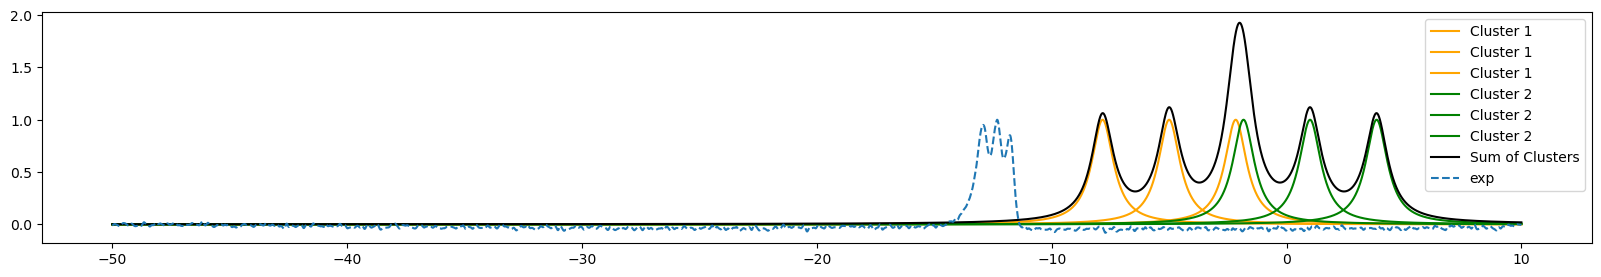

In [61]:
[cluster_1_center,cluster_2_center]  = [-5, 1] # Varying centers for Cluster 1 and 2
# print(cluster_1_centers)
# cluster_2_centers = -np.linspace(0, 5, 15) # Varying centers for Cluster 2
print(cluster_1_center, '\n', cluster_2_center)

Cluster_1_sep = 2.852759257 #separation of peaks in cluster 1
Cluster_2_sep = 2.814838969 #separation of peaks in cluster 2

peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

peak_width = 1
peak_height = 1
parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
peak_arrays = [[] for _ in range(len(parameter))]

for id, (a,i) in enumerate(parameter):
    peak_array = []
    for j in range(-peaks+2, peaks-1):
        key = f"result{id + 1}_{j}"
        result = a + j * i
        peak_array.append(result)
    peak_arrays[id] = peak_array

y_sum = np.zeros_like(x)
plt.figure(figsize=(20,3))
for id, (peak_array, color) in enumerate(zip(peak_arrays, ["orange", "green"])):
    for peak_center in peak_array:
        y = lorentz(x, gamma = peak_width, x0 = peak_center, A = peak_height)
        y_sum+= y
        plt.plot(x, y, label=f"Cluster {id + 1}", color=color)
        
        # print(f"Cluster {id + 1}, Peak Center: {peak_center}")

plt.plot(x, y_sum, color = 'black', label="Sum of Clusters")
yData = np.loadtxt('/home/shiva/WMU/PhD/Data/text/SW_Shiva_152.txt', unpack=True ) # read in  
yData = yData / max(yData)  # normalize
# Plot the experimental data
plt.plot(x, yData, '--', label="exp")   
plt.legend()

gamma = 0.27173330120759376
center_1 = -12.531700178383572
split_1 = -0.5558092703846501
center_2 = -12.319767415757548
split_2 = 0.569021206448433
A = 0.14837927852167204


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5514 (chi2/ndof = 0.2)     │             Nfcn = 1162              │
│ EDM = 7.75e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ gamma    │   0.274   │   0.004   │            │            │         │         │       │
│ 1 │ center_1 │  -12.519  │   0.004   │            │            │         │         │       │
│ 2 │ split_1  │  -0.572   │   0.004   │            │            │         │         │       │
│ 3 │ center_2 │ -12.3032  │  0.0025   │            │            │         │         │       │
│ 4 │ split_2  │  0.5772   │  0.0023   │            │            │         │         │       │
│ 5 │ A        │ 148.8e-3  │  0.8e-3   │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │     gamma  center_1   split_1  center_2   split_2         A │
├──────────┼─────────────────────────────────────────────────────────────┤
│    gamma │  1.86e-05  2.53e-06 -1.91e-07 -3.53e-06  8.51e-07  1.62e-06 │
│ center_1 │  2.53e-06  1.77e-05 -4.57e-06  4.91e-06 -1.16e-06 -1.33e-07 │
│  split_1 │ -1.91e-07 -4.57e-06  1.26e-05 -2.29e-06 -9.51e-07 -3.97e-07 │
│ center_2 │ -3.53e-06  4.91e-06 -2.29e-06  6.08e-06 -6.07e-07  -2.4e-07 │
│  split_2 │  8.51e-07 -1.16e-06 -9.51e-07 -6.07e-07  5.27e-06  3.14e-07 │
│        A │  1.62e-06 -1.33e-07 -3.97e-07  -2.4e-07  3.14e-07  5.66e-07 │
└──────────┴─────────────────────────────────────────────────────────────┘

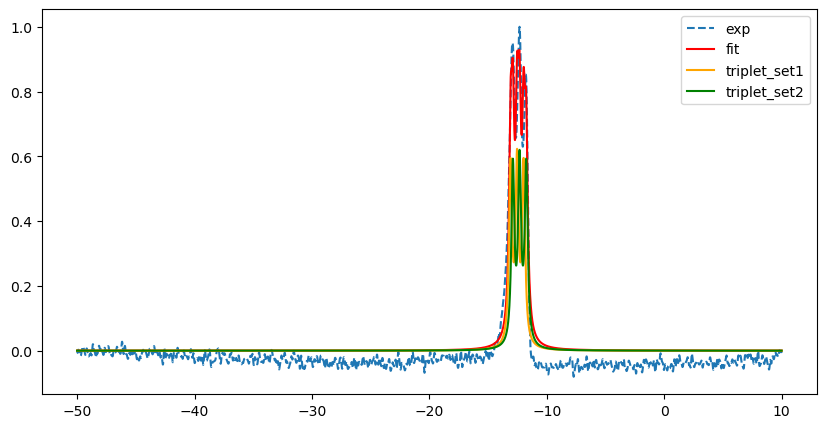

In [80]:
least_squares = LeastSquares(x, yData, 0.1, lorentz_cluster)
m = Minuit(least_squares, gamma = 1, center_1 = -10, split_1 = 2, center_2 = -10, split_2 = 2, A = 1).migrad()

# corr_mat = (m.covariance.correlation())
# print(corr_mat)
# print(m.migrad())
triplet_1 = lorentz_multi(x, m.values['gamma'], m.values['center_1'], m.values['split_1'], m.values['A'])
triplet_2 = lorentz_multi(x, m.values['gamma'], m.values['center_2'], m.values['split_2'], m.values['A'])
plt.figure(figsize=(10,5))
plt.plot(x, yData, '--', label="exp")
plt.plot(x, lorentz_cluster(x, *m.values), label="fit", color = 'red')  
plt.plot(x,triplet_1, label = "triplet_set1",color = "orange") 
plt.plot(x,triplet_2, label = "triplet_set2",color = "green")
plt.legend()
for key, value in zip(m.parameters, m.values):
    print(f"{key} = {value}")
m.migrad()


In [77]:
m.values['center_1']


[-15.         -14.64285714 -14.28571429 -13.92857143 -13.57142857
 -13.21428571 -12.85714286 -12.5        -12.14285714 -11.78571429
 -11.42857143 -11.07142857 -10.71428571 -10.35714286 -10.        ] 
 [-10.         -10.35714286 -10.71428571 -11.07142857 -11.42857143
 -11.78571429 -12.14285714 -12.5        -12.85714286 -13.21428571
 -13.57142857 -13.92857143 -14.28571429 -14.64285714 -15.        ]


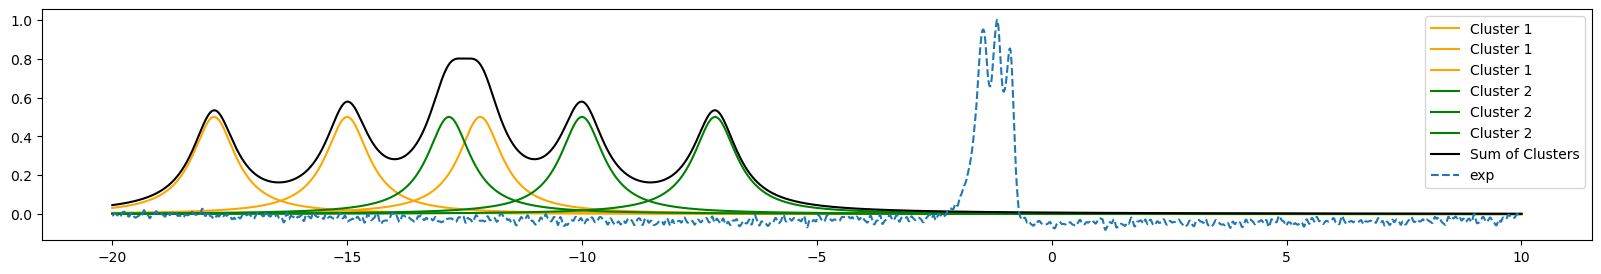

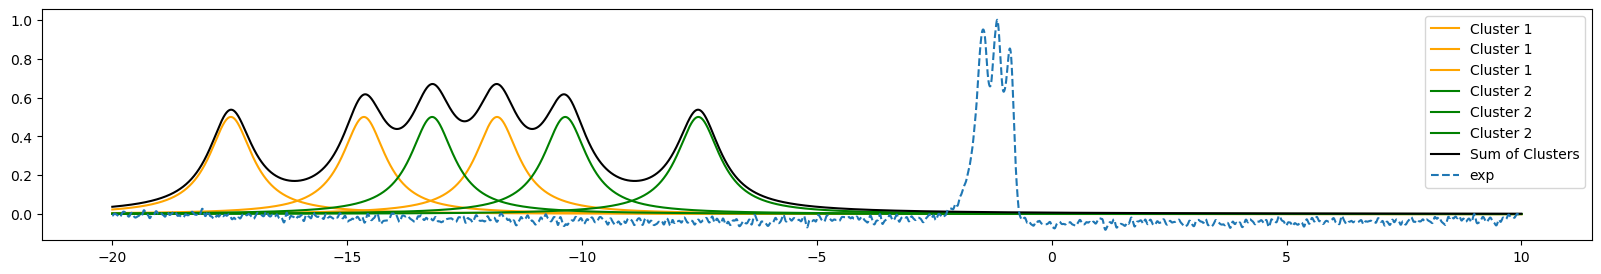

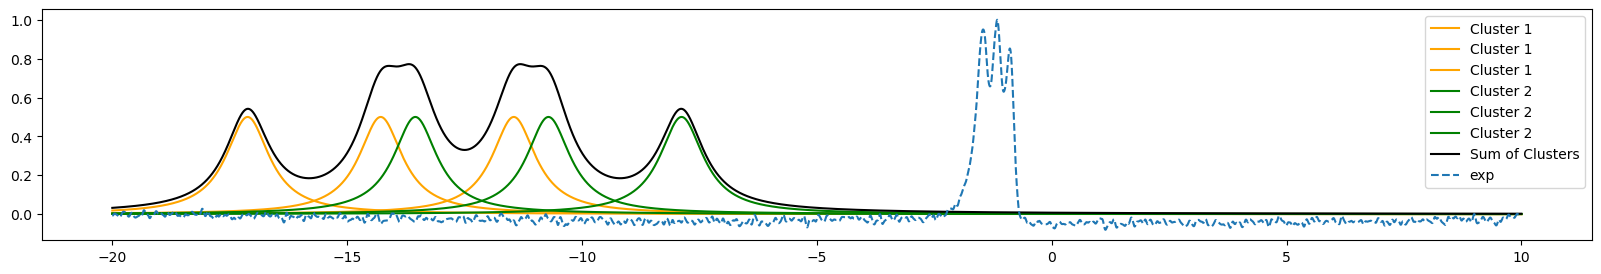

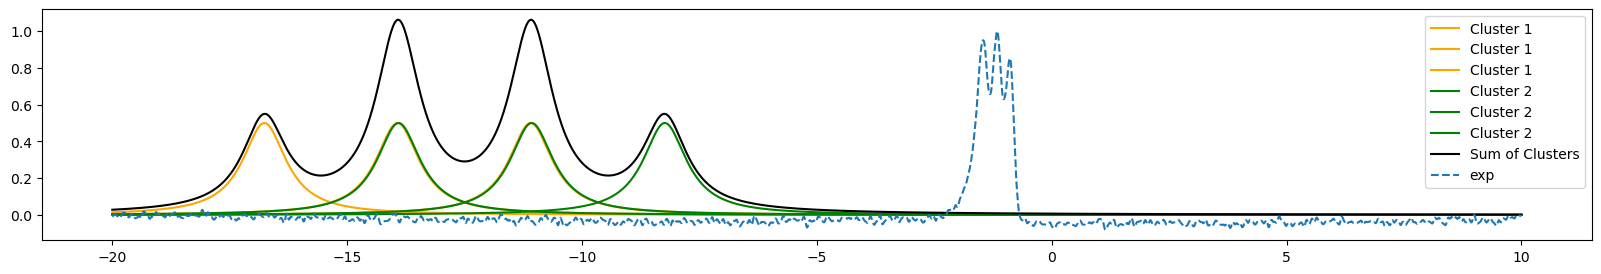

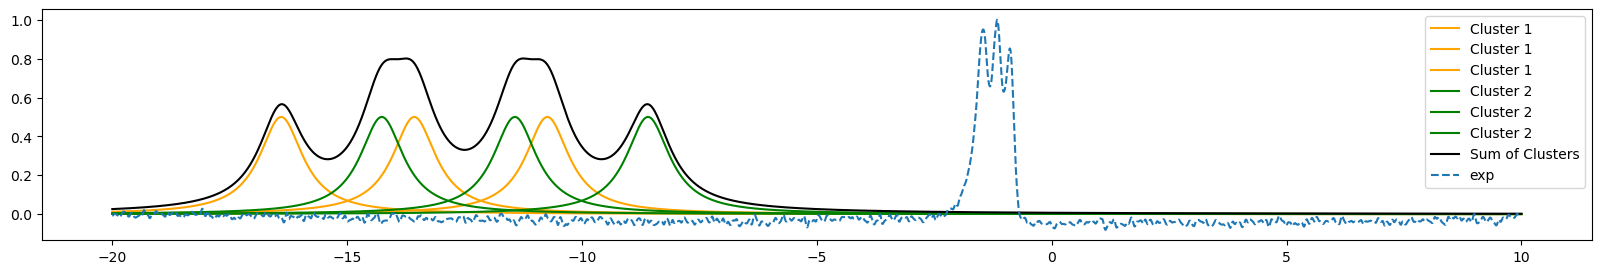

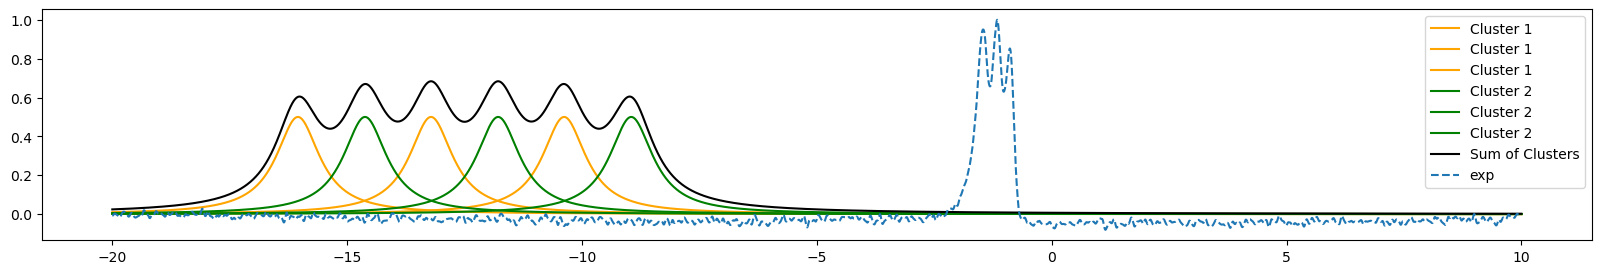

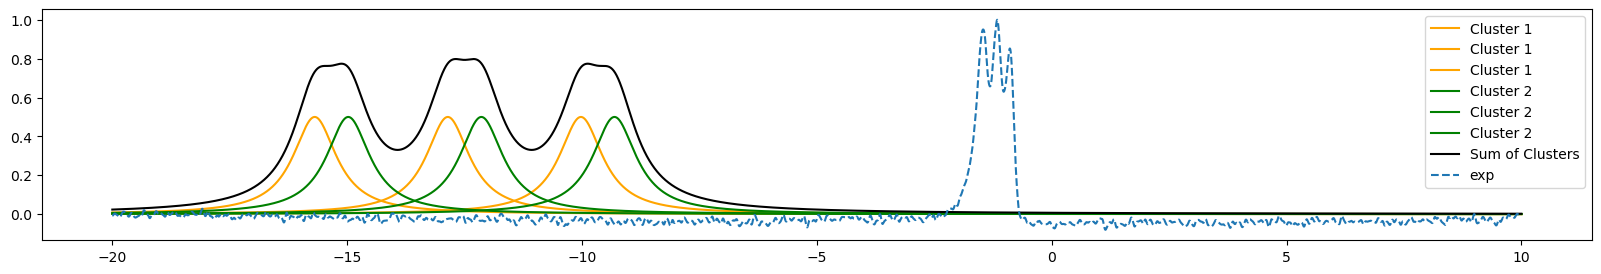

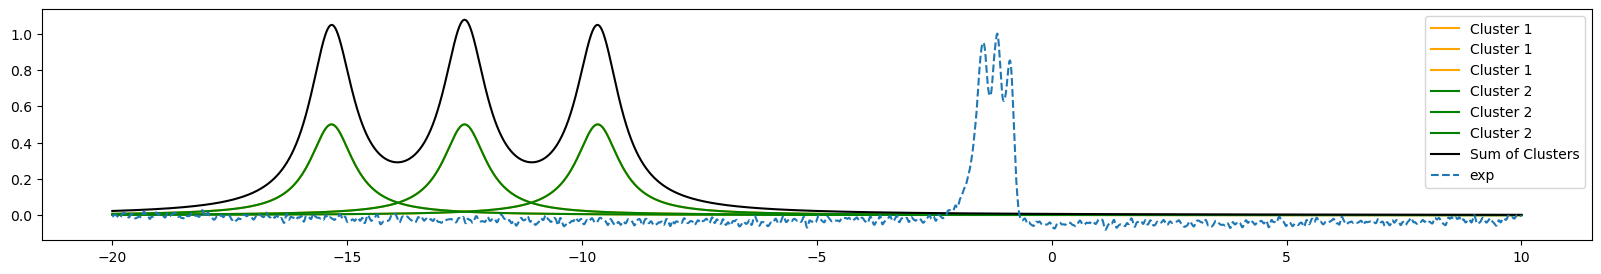

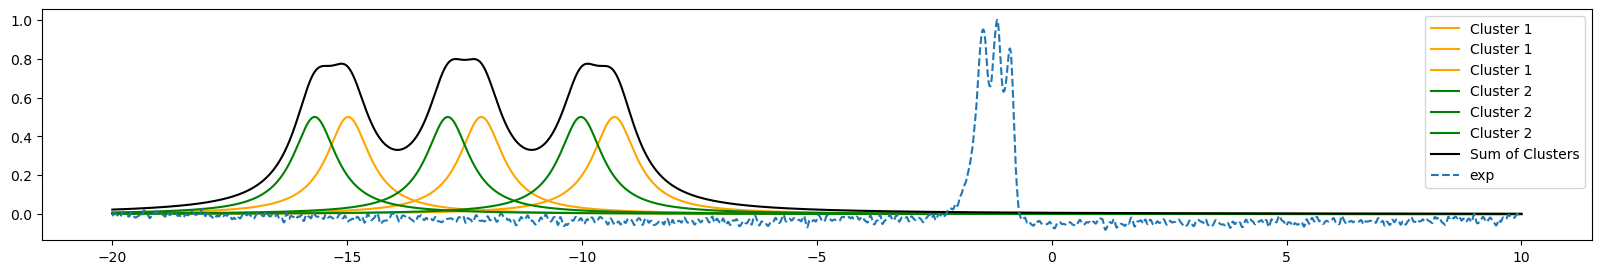

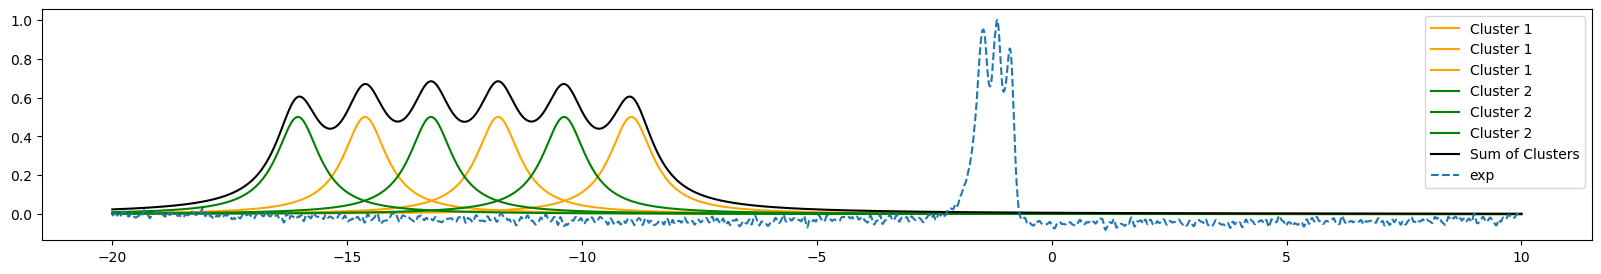

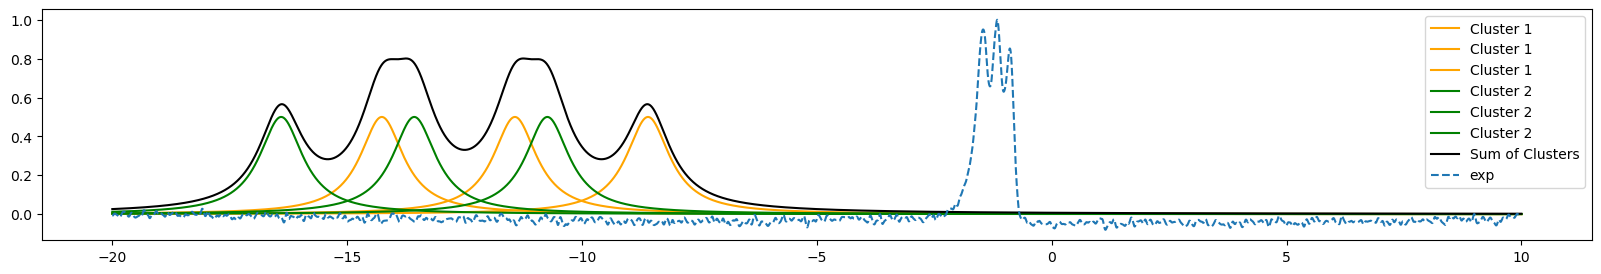

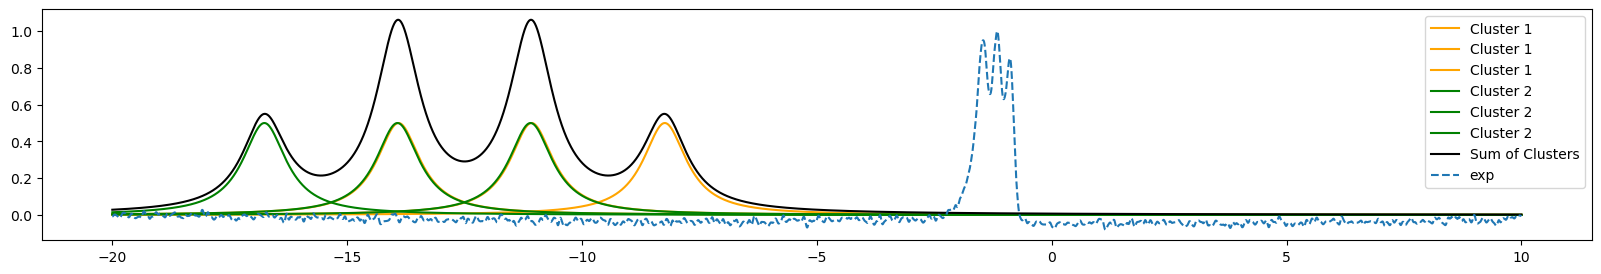

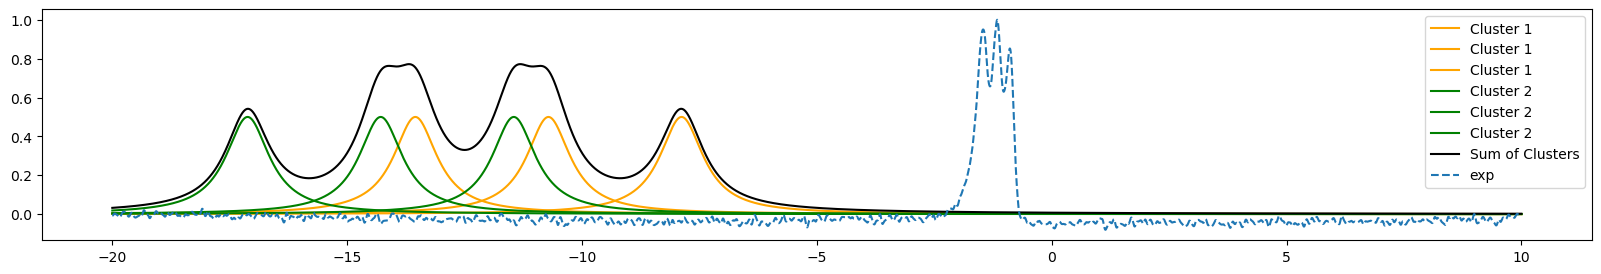

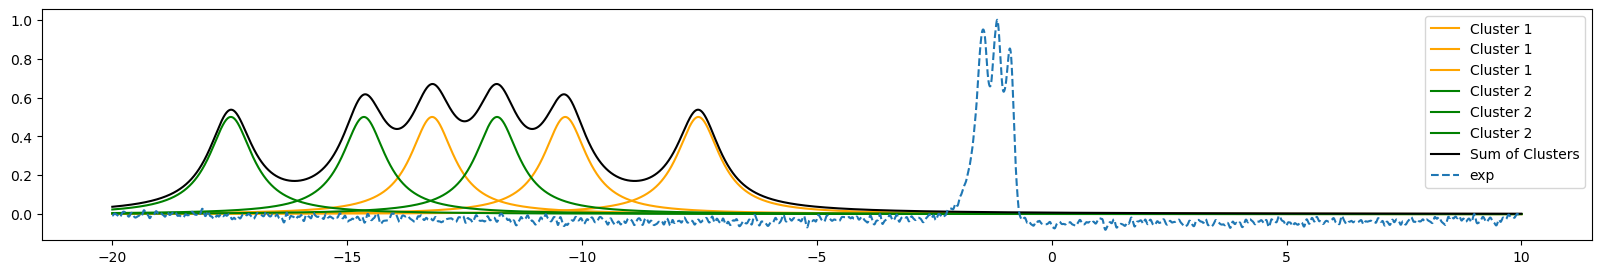

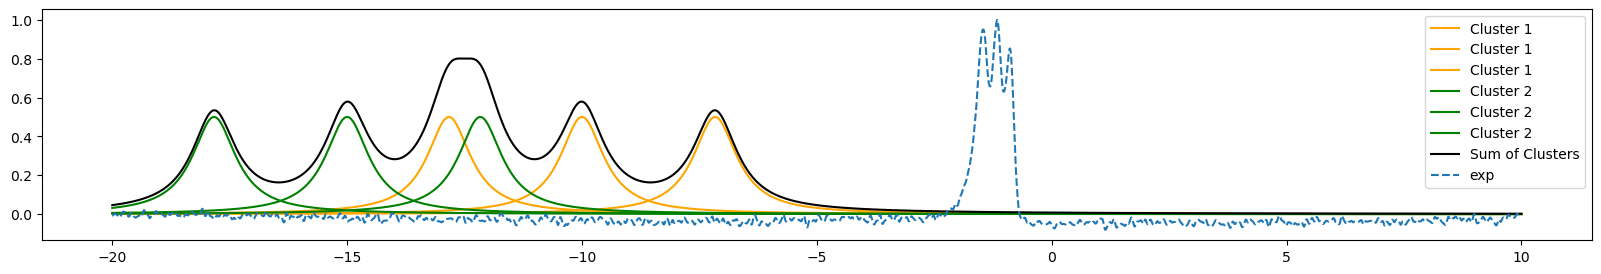

In [ ]:

[cluster_1_centers,cluster_2_centers]  = [np.linspace(-15, -10, 15), np.linspace(-10, -15, 15)] # Varying centers for Cluster 1 and 2
# print(cluster_1_centers)
# cluster_2_centers = -np.linspace(0, 5, 15) # Varying centers for Cluster 2
print(cluster_1_centers, '\n', cluster_2_centers)

Cluster_1_sep = 2.852759257 #separation of peaks in cluster 1
Cluster_2_sep = 2.814838969 #separation of peaks in cluster 2

peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

peak_width = 1
peak_height = 0.5
for (cluster_1_center, cluster_2_center) in zip(cluster_1_centers, cluster_2_centers):
    parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
    peak_arrays = [[] for _ in range(len(parameter))]

    for id, (a,i) in enumerate(parameter):
        peak_array = []
        for j in range(-peaks+2, peaks-1):
            key = f"result{id + 1}_{j}"
            result = a + j * i
            peak_array.append(result)
        peak_arrays[id] = peak_array

    y_sum = np.zeros_like(x)
    plt.figure(figsize=(20,3))
    for id, (peak_array, color) in enumerate(zip(peak_arrays, ["orange", "green"])):
        for peak_center in peak_array:
            y = lorentz(x, gamma = peak_width, x0 = peak_center, A = peak_height)
            y_sum+= y
            plt.plot(x, y, label=f"Cluster {id + 1}", color=color)
            
            # print(f"Cluster {id + 1}, Peak Center: {peak_center}")

    plt.plot(x, y_sum, color = 'black', label="Sum of Clusters")
    yData = np.loadtxt('/home/shiva/WMU/PhD/Data/text/SW_Shiva_152.txt', unpack=True ) # read in  
    yData = yData / max(yData)  # normalize
    # Plot the experimental data
    plt.plot(x, yData, '--', label = "exp")   
    plt.legend()

In [ ]:
for id, peak_array in enumerate(peak_arrays):
    print(peak_array)
print(peak_arrays)

[-12.833799113000001, -10.0, -7.166200887]
[-17.833799113, -15.0, -12.166200886999999]
[[-12.833799113000001, -10.0, -7.166200887], [-17.833799113, -15.0, -12.166200886999999]]
